# Project: Stock Market Analysis and Prediction

## Stock Market Data From Google Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Google Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [5]:
pip install yfinance


In [8]:
import yfinance as yf
from datetime import datetime, timedelta

# List of tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Dictionary to store stock data
stock_data = {}

# For-loop for grabbing Yahoo Finance data
for stock in tech_list:
    try:
        # Use yfinance directly
        stock_data[stock] = yf.download(stock, start=start, end=end)
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Define AAPL as a variable
AAPL = stock_data.get('AAPL')  # Extract the data for AAPL from the dictionary

# Check if AAPL data is available and display it
if AAPL is not None:
    print("AAPL Stock Data:")
    print(AAPL.head())  # Display the first few rows of the AAPL DataFrame
else:
    print("Data for AAPL is not available.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL Stock Data:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-22  192.944748  194.377730  191.322690  191.362503  60133900
2024-01-23  194.228455  194.795683  192.885045  194.069246  42355600
2024-01-24  193.551773  195.422613  193.392549  194.467286  53631300
2024-01-25  193.223404  195.313172  192.168574  194.268288  54822100
2024-01-26  191.481934  193.810522  191.004278  193.322921  44594000


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL(Apple) Stock DataFrame to get a feel for the data.

In [9]:
AAPL.head()

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-22  192.944748  194.377730  191.322690  191.362503  60133900
2024-01-23  194.228455  194.795683  192.885045  194.069246  42355600
2024-01-24  193.551773  195.422613  193.392549  194.467286  53631300
2024-01-25  193.223404  195.313172  192.168574  194.268288  54822100
2024-01-26  191.481934  193.810522  191.004278  193.322921  44594000

In [10]:
# Summery stats for Apple Stock
AAPL.describe()

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean    209.310709  211.108364  207.322318  209.161963  5.669196e+07
std      26.035671   26.130237   25.657956   25.920148  3.094154e+07
min     164.405121  165.800067  163.488440  164.753864  2.323470e+07
25%     184.515636  186.222350  182.867252  185.041587  4.120708e+07
50%     218.177147  220.689535  216.052363  218.546312  4.966605e+07
75%     228.274998  229.927652  226.339797  228.437504  6.232015e+07
max     259.019989  260.100006  257.630005  258.190002  3.186799e+08

In [11]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-22 to 2025-01-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the AAPL(Apple) stocks.

<Axes: xlabel='Date'>

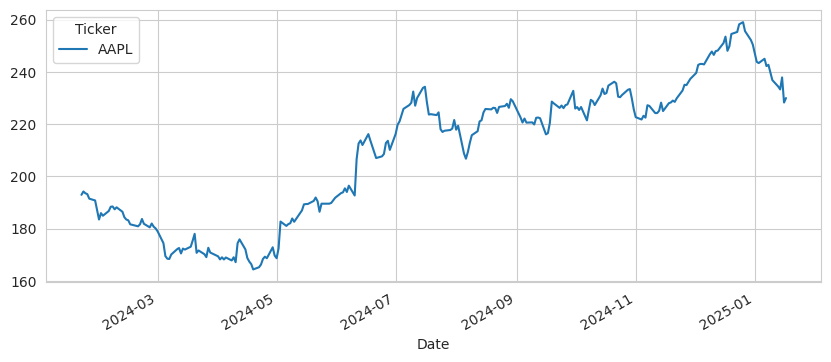

In [12]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

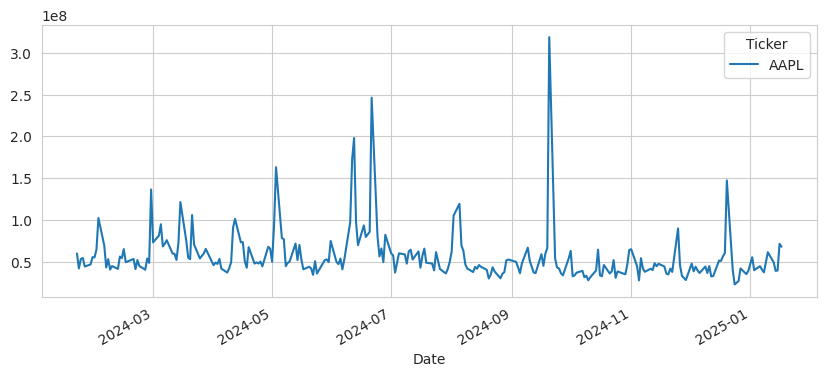

In [13]:
# Now let's plot the total volume of stock being traded each day over the past year

AAPL['Volume'].plot(legend=True, figsize=(10,4))

We can see that on Feb'2017 was the higher for AAPL stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
Let's go ahead and caculate the moving average for the AAPL stock.


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [15]:
import pandas as pd

# List of moving average days
MA_day = [10, 20, 50, 100]

# Calculate and add moving averages to the AAPL DataFrame
for ma in MA_day:
    column_name = f"MA for {ma} days"
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

# Display the updated DataFrame with moving averages
print(AAPL.head())


Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-01-22  192.944748  194.377730  191.322690  191.362503  60133900   
2024-01-23  194.228455  194.795683  192.885045  194.069246  42355600   
2024-01-24  193.551773  195.422613  193.392549  194.467286  53631300   
2024-01-25  193.223404  195.313172  192.168574  194.268288  54822100   
2024-01-26  191.481934  193.810522  191.004278  193.322921  44594000   

Price      MA for 10 days MA for 20 days MA for 50 days MA for 100 days  
Ticker                                                                   
Date                                                                     
2024-01-22            NaN            NaN            NaN             NaN  
2024-01-23            NaN            NaN            NaN             NaN  
2024-01-24            NaN            NaN            N

Now, lets plot all the additional Moving Averages for AAPL stock

<Axes: xlabel='Date'>

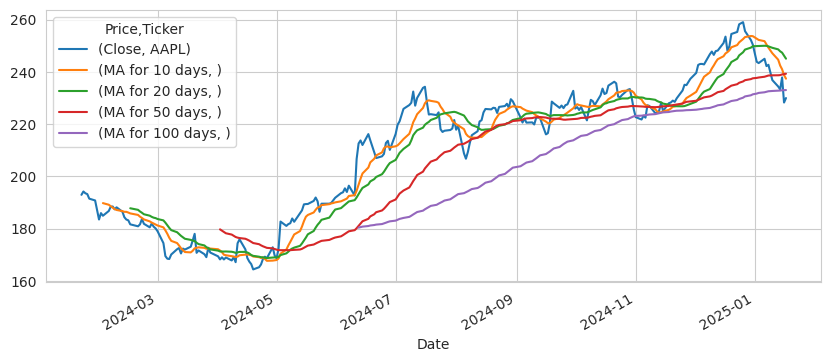

In [16]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock.


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.


<Axes: xlabel='Date'>

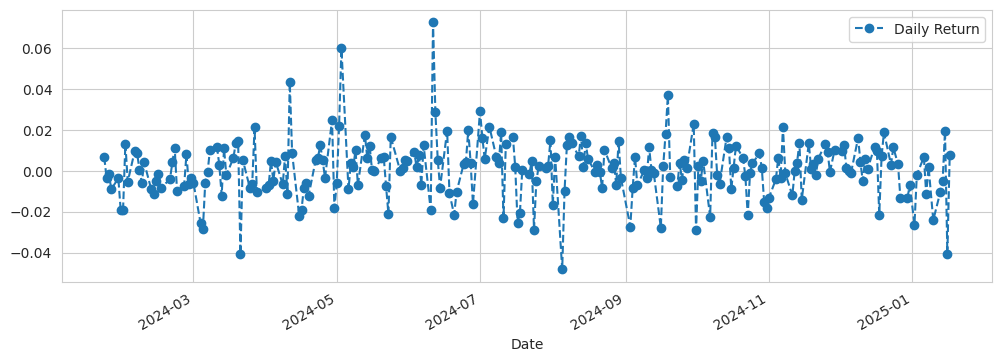

In [17]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

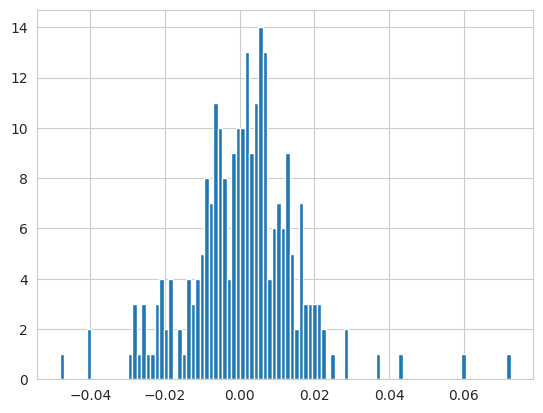

In [18]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

<ipython-input-19-122d8df47476>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')


<Axes: xlabel='Daily Return', ylabel='Density'>

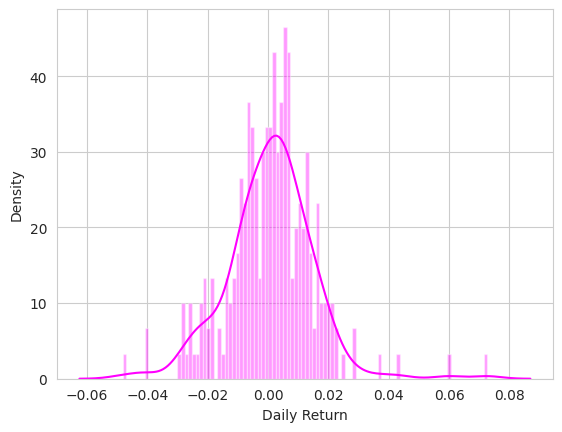

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [23]:
closingprice_df = pd.DataFrame()

for stock in tech_list:
    try:
        data = yf.download(stock, start=start, end=end)
        closingprice_df[stock] = data['Close']
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
closingprice_df.head(10)

AAPL       GOOGL        MSFT        AMZN
Date                                                      
2024-01-22  192.944748  145.462677  393.566925  154.779999
2024-01-23  194.228455  146.508896  395.939178  156.020004
2024-01-24  193.551773  148.162888  399.572052  156.869995
2024-01-25  193.223389  151.321442  401.864929  157.750000
2024-01-26  191.481918  151.640289  400.931854  159.119995
2024-01-29  190.795288  152.955521  406.678894  161.259995
2024-01-30  187.123276  150.912933  405.557281  159.000000
2024-01-31  183.501022  139.593964  394.629028  155.199997
2024-02-01  185.949036  140.650146  400.782990  159.279999
2024-02-02  184.943970  141.865723  408.167755  171.809998

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.

In [25]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [26]:
tech_returns.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2024-01-22       NaN       NaN       NaN       NaN
2024-01-23  0.006653  0.007192  0.006028  0.008011
2024-01-24 -0.003484  0.011289  0.009175  0.005448
2024-01-25 -0.001697  0.021318  0.005738  0.005610
2024-01-26 -0.009013  0.002107 -0.002322  0.008685

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

##### GOOGL is a Alphabet Inc Class A Stock.

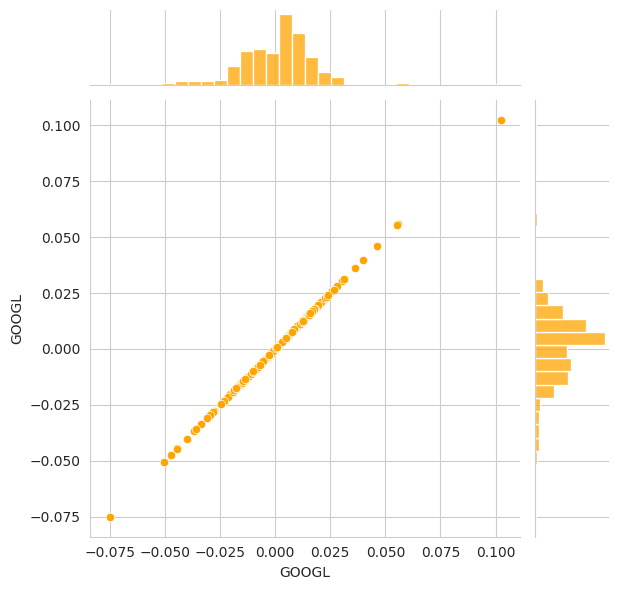

In [28]:
import seaborn as sns

# Assuming 'tech_returns' is a DataFrame that contains stock returns for each stock in 'tech_list'
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

So let's go ahead and compare Google and Amazon the same way.

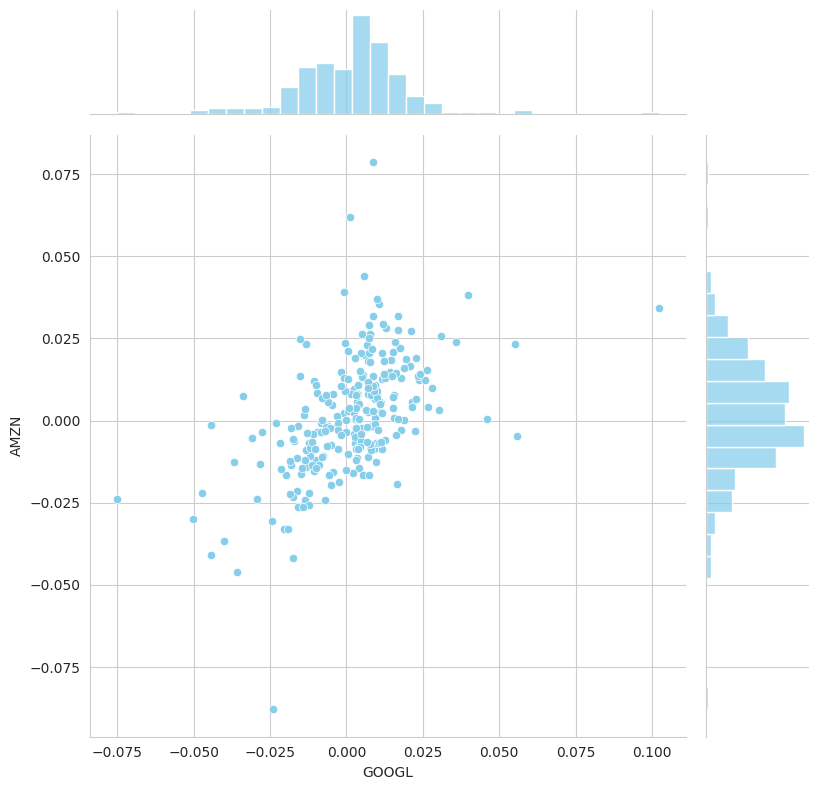

In [30]:
import seaborn as sns

# Assuming 'tech_returns' is a DataFrame containing daily returns for 'GOOGL' and 'AMZN'
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', height=8, color='skyblue')


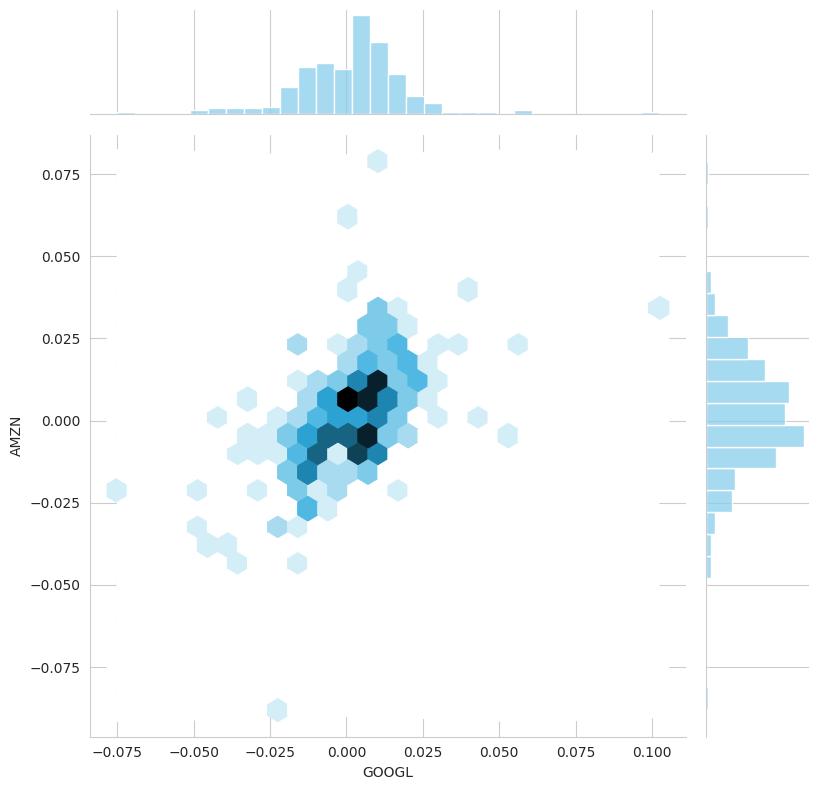

In [31]:
import seaborn as sns

# Assuming 'tech_returns' is a DataFrame containing daily returns for 'GOOGL' and 'AMZN'
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', height=8, color='skyblue')

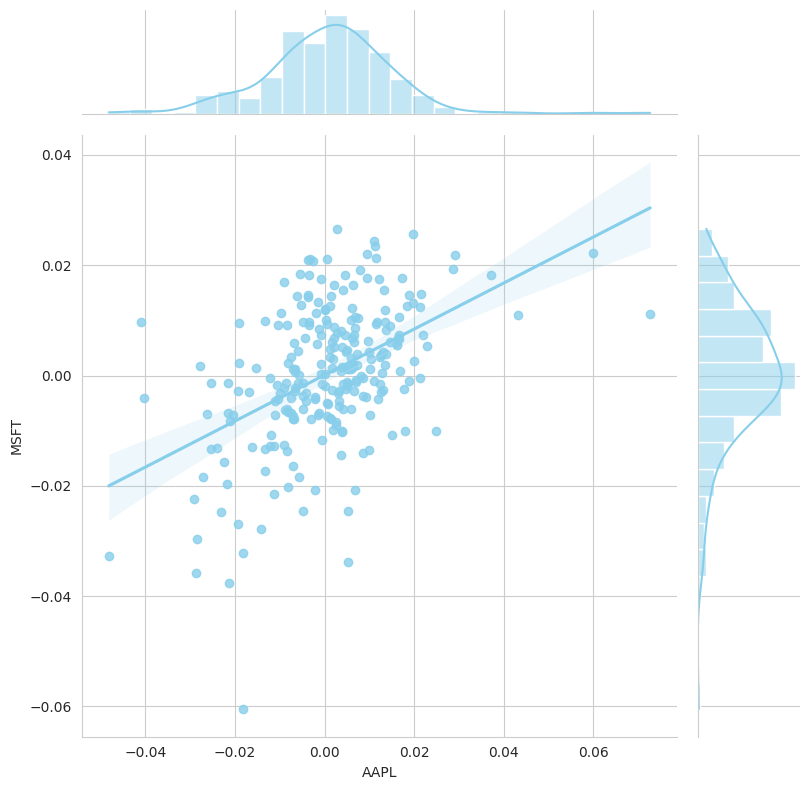

In [32]:
import seaborn as sns

# Assuming 'tech_returns' is a DataFrame containing daily returns for 'AAPL' and 'MSFT'
sns.jointplot(x='AAPL', y='MSFT', data=tech_returns, kind='reg', height=8, color='skyblue')


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

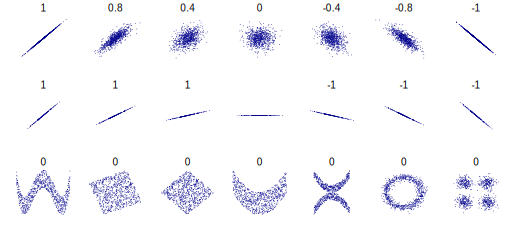

In [33]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


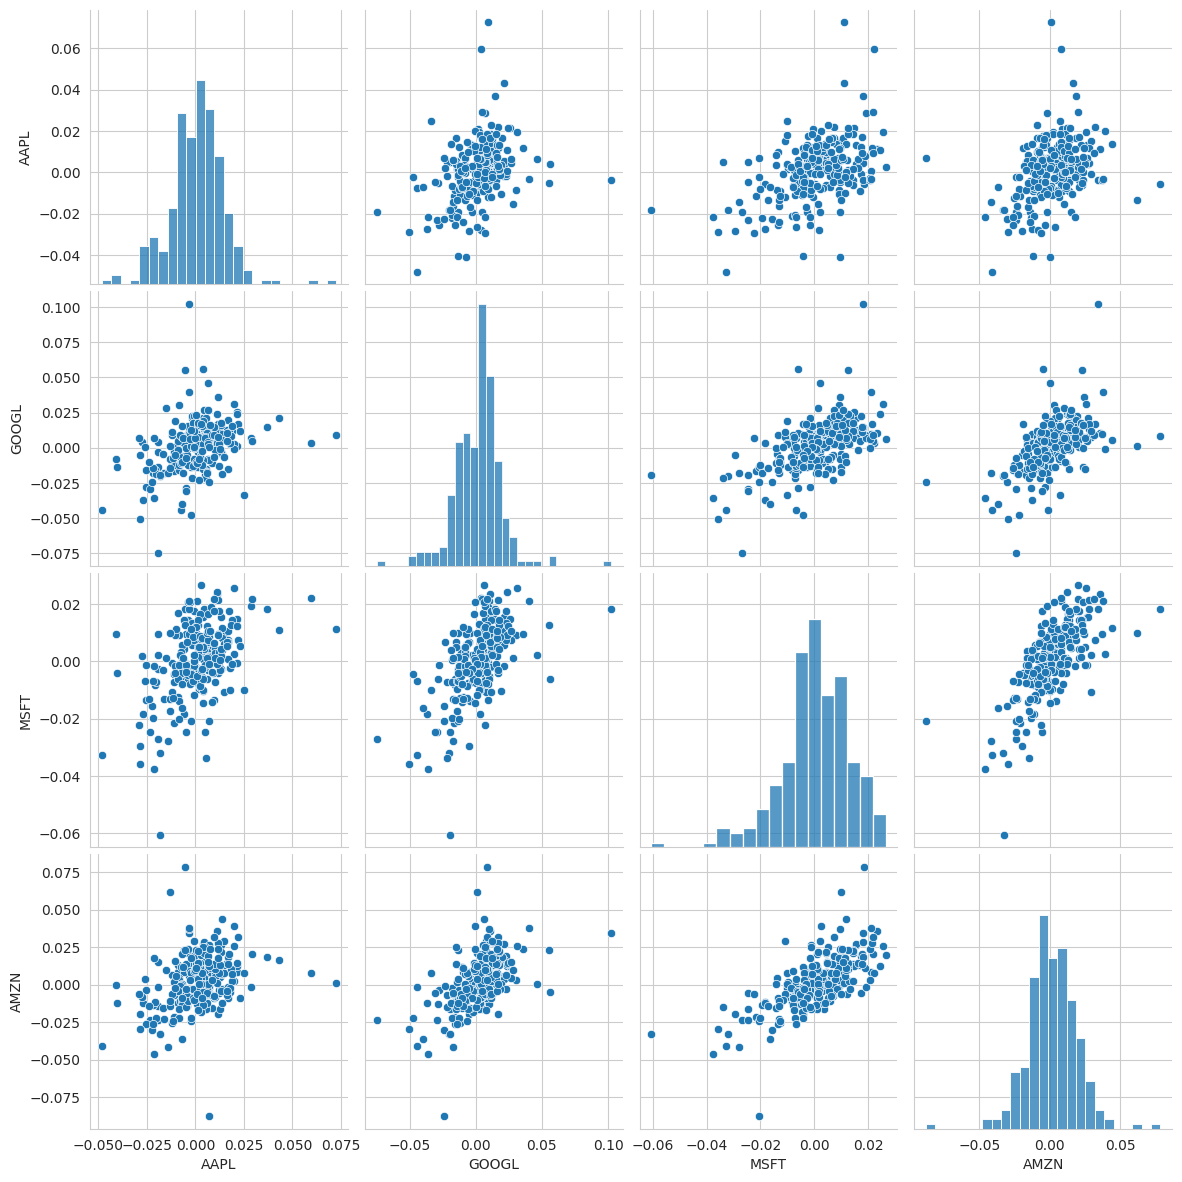

In [34]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

Below is an example of utilizing the full power of seaborn to achieve this result.

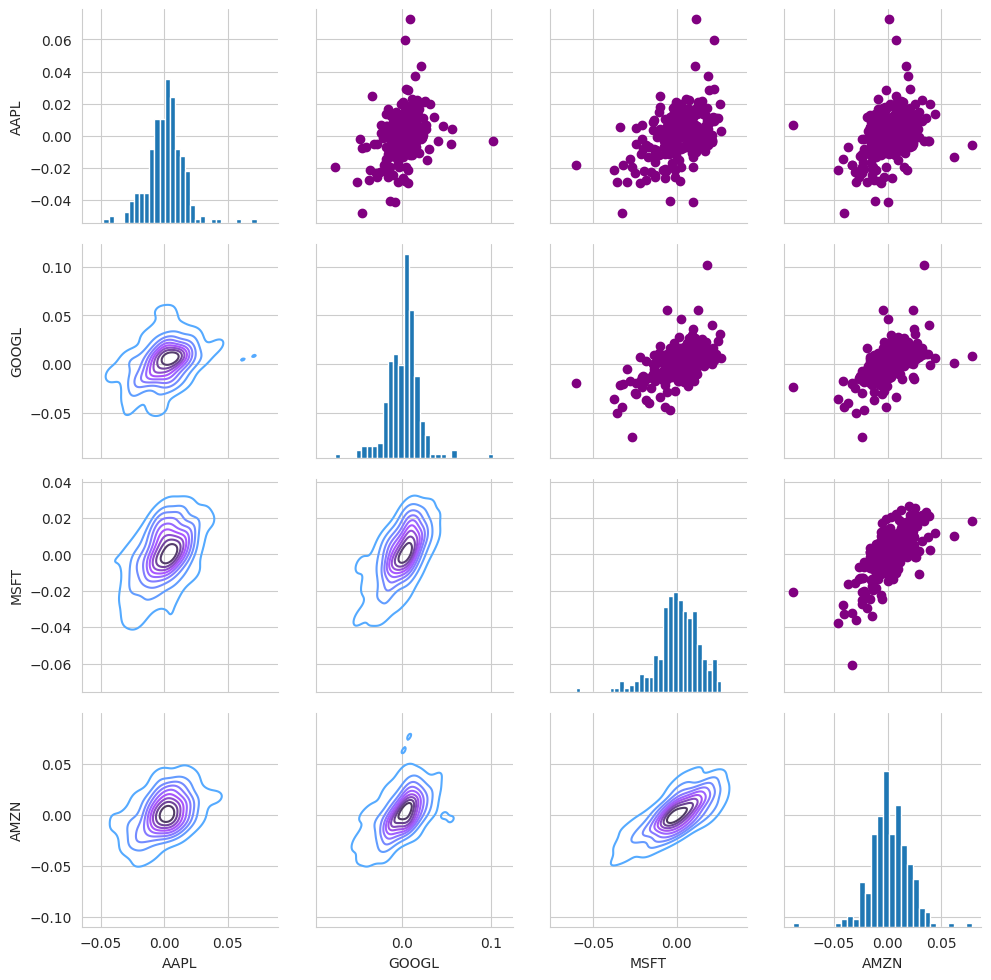

In [35]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

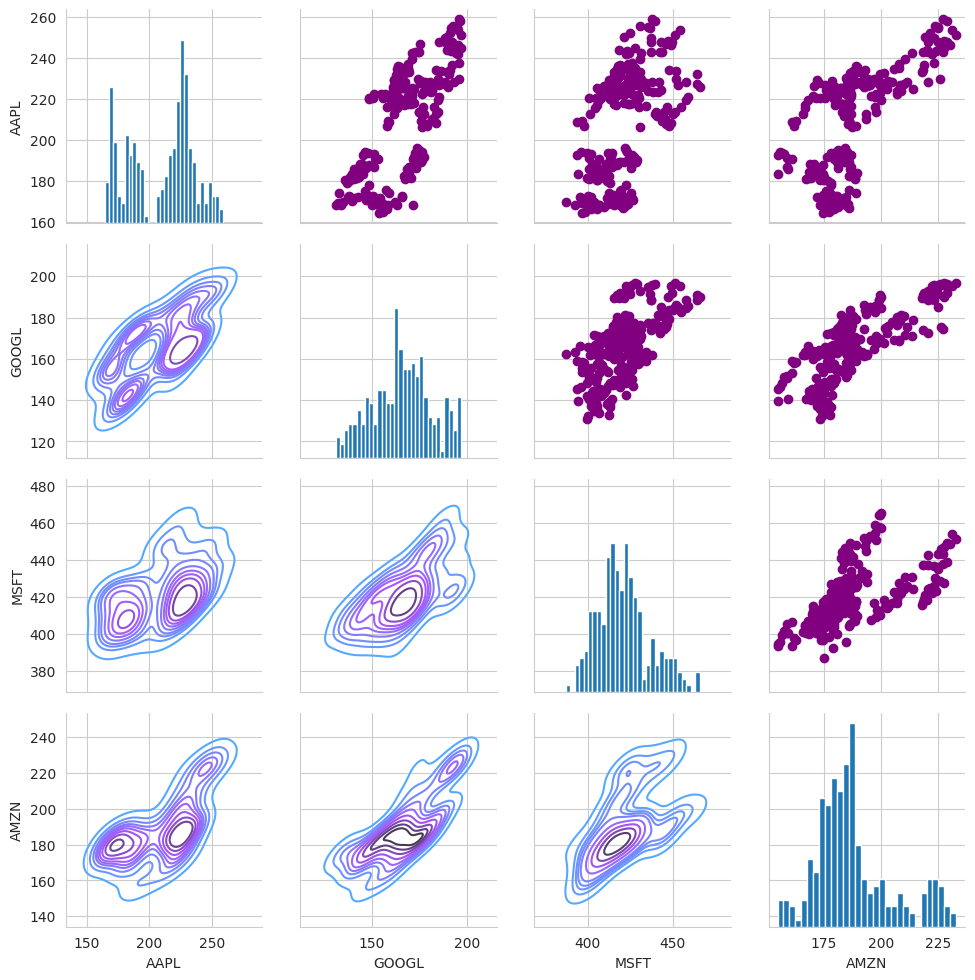

In [36]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

<Axes: >

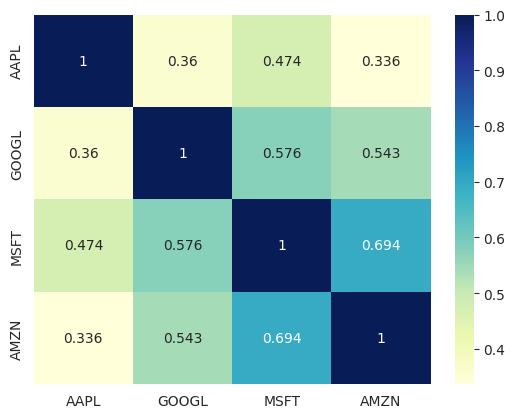

In [37]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: >

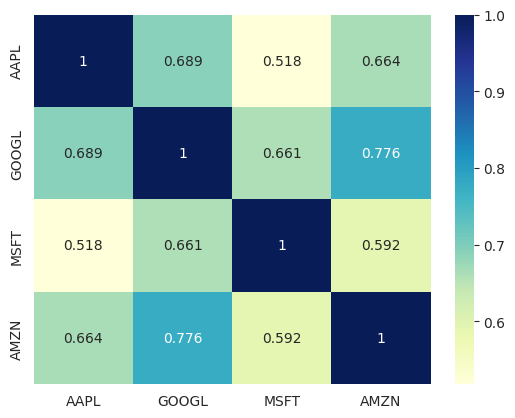

In [39]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

##### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [40]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [41]:
rets.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2024-01-23  0.006653  0.007192  0.006028  0.008011
2024-01-24 -0.003484  0.011289  0.009175  0.005448
2024-01-25 -0.001697  0.021318  0.005738  0.005610
2024-01-26 -0.009013  0.002107 -0.002322  0.008685
2024-01-29 -0.003586  0.008673  0.014334  0.013449

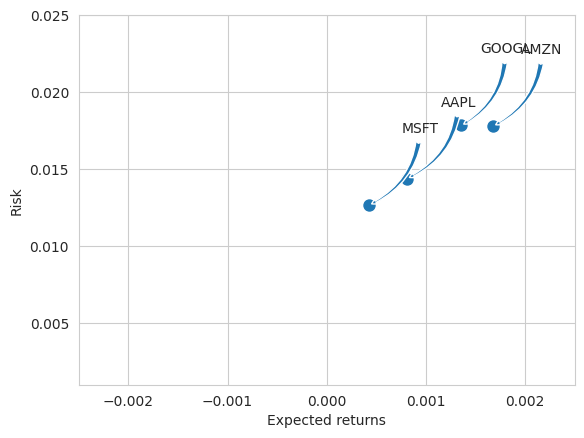

In [42]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

<ipython-input-43-72a358cc23c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

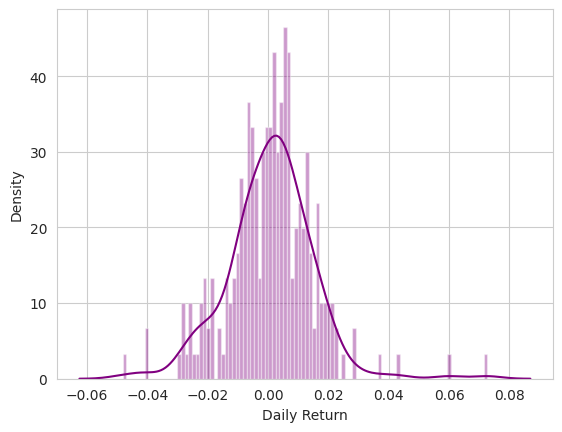

In [43]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [45]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.022944848418811503

The 0.05 empirical quantile of daily returns is at -0.016. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.

In [46]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.024199928020793494

In [47]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.026350528855427057

In [48]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.022011392021378605

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [49]:
rets.head()

AAPL     GOOGL      MSFT      AMZN
Date                                              
2024-01-23  0.006653  0.007192  0.006028  0.008011
2024-01-24 -0.003484  0.011289  0.009175  0.005448
2024-01-25 -0.001697  0.021318  0.005738  0.005610
2024-01-26 -0.009013  0.002107 -0.002322  0.008685
2024-01-29 -0.003586  0.008673  0.014334  0.013449

In [50]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [51]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price

    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in range(1,days):

        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

Awesome! Now lets put above function to work.

In [53]:
# Assuming 'closingprice_df' contains the stock data for Google
print(closingprice_df['GOOGL'].head())


Date
2024-01-22    145.462677
2024-01-23    146.508896
2024-01-24    148.162888
2024-01-25    151.321442
2024-01-26    151.640289
Name: GOOGL, dtype: float64


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

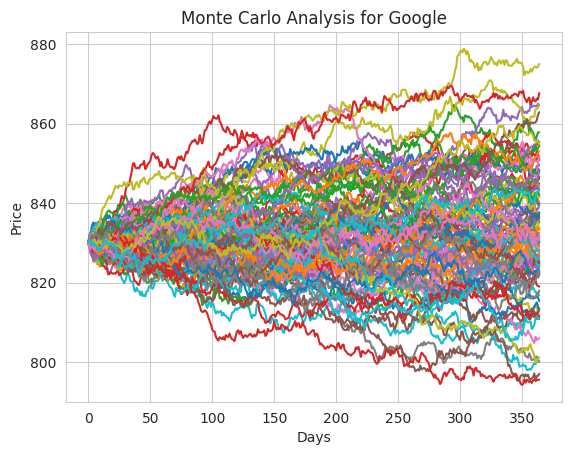

In [55]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')

In [58]:
# Assuming 'closingprice_df' contains the stock data for Google
print(closingprice_df['AMZN'].head())


Date
2024-01-22    154.779999
2024-01-23    156.020004
2024-01-24    156.869995
2024-01-25    157.750000
2024-01-26    159.119995
Name: AMZN, dtype: float64


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

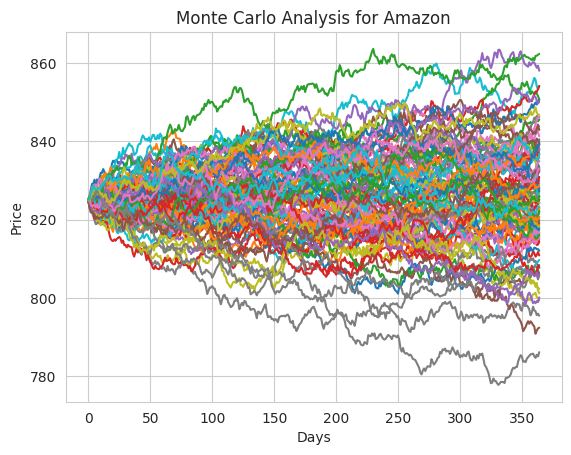

In [59]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Amazon')

In [60]:
# For Apple Stock - AAPL
AAPL.head()

Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-01-22  192.944748  194.377730  191.322690  191.362503  60133900   
2024-01-23  194.228455  194.795683  192.885045  194.069246  42355600   
2024-01-24  193.551773  195.422613  193.392549  194.467286  53631300   
2024-01-25  193.223404  195.313172  192.168574  194.268288  54822100   
2024-01-26  191.481934  193.810522  191.004278  193.322921  44594000   

Price      MA for 10 days MA for 20 days MA for 50 days MA for 100 days  \
Ticker                                                                    
Date                                                                      
2024-01-22            NaN            NaN            NaN             NaN   
2024-01-23            NaN            NaN            NaN             NaN   
2024-01-24            NaN            NaN            NaN             NaN   
2024-01-25            NaN            NaN            NaN             NaN   
2024-01-26            NaN            NaN            NaN             NaN   

Price      Daily Return  
Ticker                   
Date                     
2024-01-22          NaN  
2024-01-23     0.006653  
2024-01-24    -0.003484  
2024-01-25    -0.001697  
2024-01-26    -0.009013

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

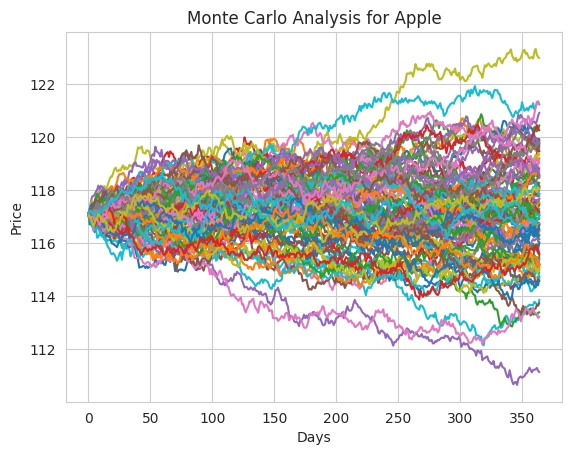

In [61]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Apple')

In [63]:
# Assuming 'closingprice_df' contains the stock data for Google
print(closingprice_df['MSFT'].head())


Date
2024-01-22    393.566925
2024-01-23    395.939178
2024-01-24    399.572052
2024-01-25    401.864929
2024-01-26    400.931854
Name: MSFT, dtype: float64


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

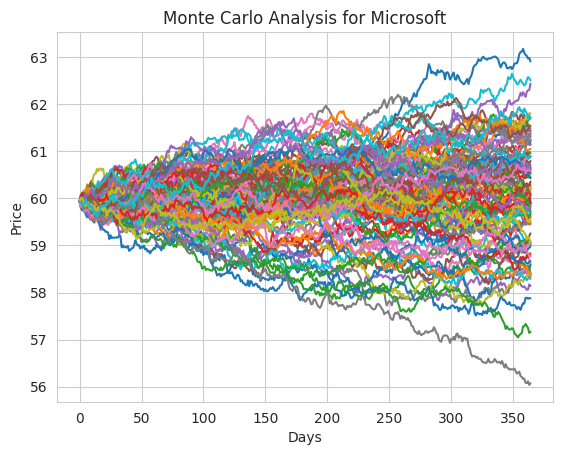

In [64]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Microsoft')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [65]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

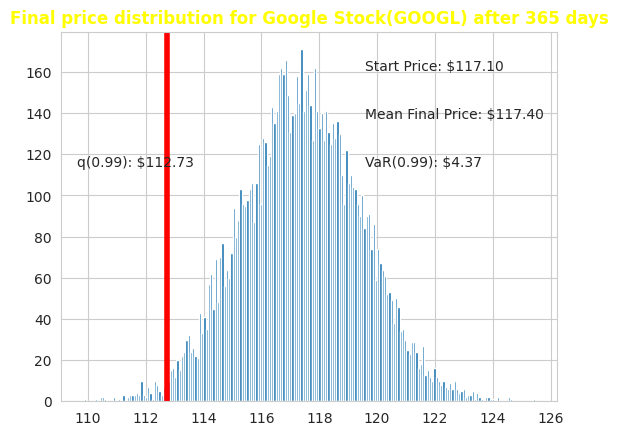

In [72]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Corrected plot title with valid color
plt.title("Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='yellow')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of
830.09 (The price of one initial Google Stock).

This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [69]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

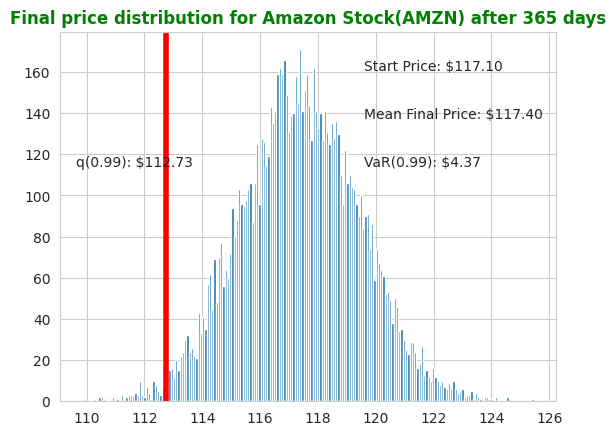

In [73]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Corrected plot title with valid color
plt.title("Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='green')


This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.

In [71]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

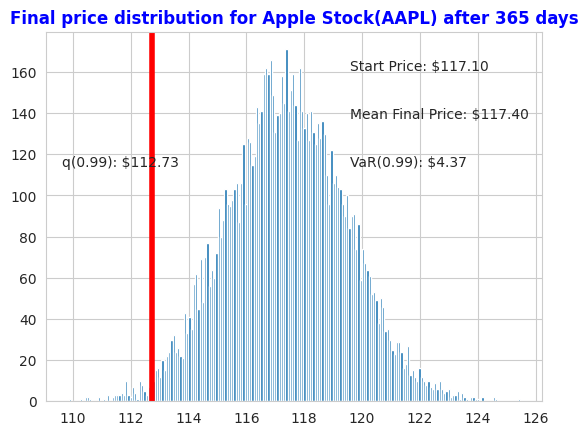

In [75]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Corrected plot title with valid color
plt.title("Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='blue')


Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.

In [76]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

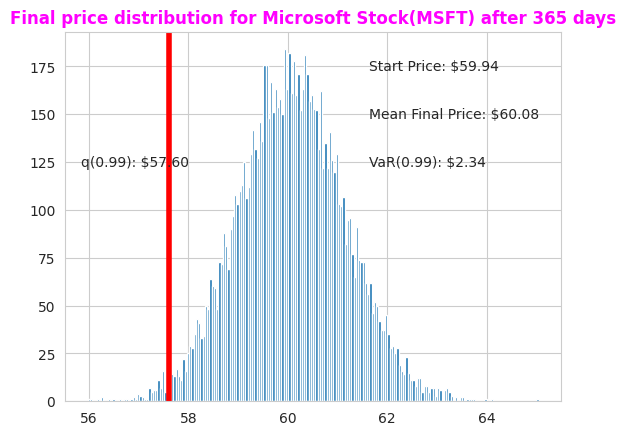

In [78]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6, 0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6, 0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Corrected plot title with valid color
plt.title("Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='magenta')


Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.

Now lets estiamte the Value at Risk(VaR) for a stock related to other domains.


We'll estimate the VaR for:
 - Johnson & Johnson > JNJ (U.S.: NYSE) [JNJ](http://quotes.wsj.com/JNJ)
 - Wal-Mart Stores Inc. > WMT (U.S.: NYSE) [WMT](http://quotes.wsj.com/WMT)
 - Nike Inc. > NKE (U.S.: NYSE) [NKE](http://quotes.wsj.com/NKE)


By using the above methods to get Value at Risk.

In [82]:
import yfinance as yf
from datetime import datetime, timedelta

# List of NYSE stocks for analytics
NYSE_list = ['JNJ', 'NKE', 'WMT']

# Set up Start and End time for data grab
end = datetime.now()
start = end - timedelta(days=365)

# Dictionary to store stock data
stock_data = {}

# For-loop for grabbing Yahoo Finance data using yfinance
for stock in NYSE_list:
    try:
        stock_data[stock] = yf.download(stock, start=start, end=end)
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Check if JNJ data is available and then define it
if 'JNJ' in stock_data:
    JNJ = stock_data['JNJ']
else:
    print("JNJ data is not available.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's go ahead and play aorund with the JNJ(Johnson & Johnson) Stock DataFrame to get a feel for the data.

In [84]:
JNJ.head()

Price            Close        High         Low        Open   Volume
Ticker             JNJ         JNJ         JNJ         JNJ      JNJ
Date                                                               
2024-01-22  157.484192  158.560129  156.388864  157.028614  6824200
2024-01-23  154.905838  155.584354  152.094838  154.760447  9149800
2024-01-24  154.081909  155.671581  153.306456  154.847659  7247900
2024-01-25  154.663483  154.721639  153.606936  154.120670  5478900
2024-01-26  154.605347  155.807300  154.469644  155.506800  5591900

In [85]:
JNJ.describe()

Price        Close        High         Low        Open        Volume
Ticker         JNJ         JNJ         JNJ         JNJ           JNJ
count   250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean    152.502335  153.547135  151.411983  152.515612  7.274970e+06
std       6.731785    6.727071    6.703734    6.722232  2.213763e+06
min     141.080307  142.017907  139.791095  141.000000  3.164100e+06
25%     145.905277  146.808791  144.674212  145.736172  5.693500e+06
50%     152.952003  153.832425  151.521814  152.763492  6.867350e+06
75%     157.732563  158.723235  156.643312  157.807159  8.450350e+06
max     166.047668  167.505962  165.422678  166.474232  1.770280e+07

In [86]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-22 to 2025-01-17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, JNJ)   250 non-null    float64
 1   (High, JNJ)    250 non-null    float64
 2   (Low, JNJ)     250 non-null    float64
 3   (Open, JNJ)    250 non-null    float64
 4   (Volume, JNJ)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


Now that we've seen the DataFrame, let's go ahead and plot out the closing prices of NYSE stocks.

<Axes: title={'center': 'Closing Price - JNJ'}, xlabel='Date'>

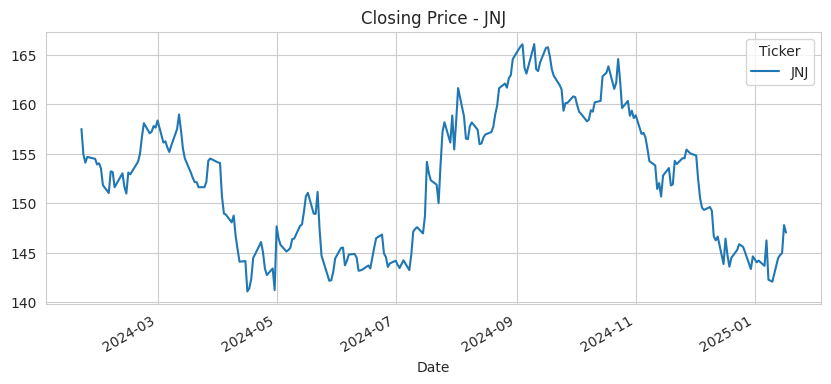

In [87]:
# Let's see a historical view of the closing price for JNJ(Johnson & Johnson)
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))

<Axes: title={'center': 'Closing Price - NKE'}, xlabel='Date'>

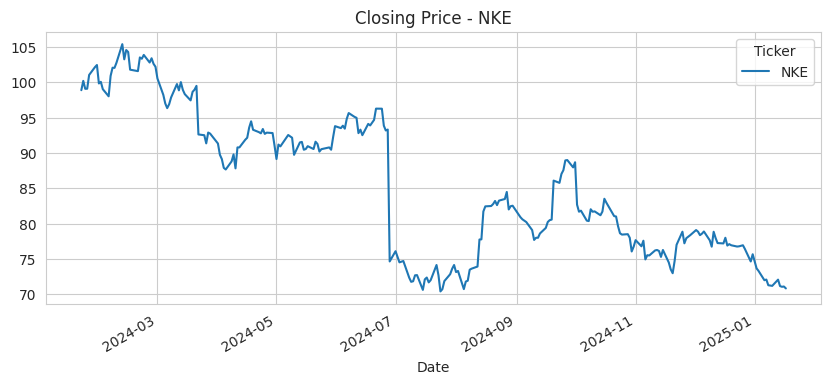

In [89]:
# Define NKE after fetching the data
if 'NKE' in stock_data:
    NKE = stock_data['NKE']
else:
    print("NKE data is not available.")

# Now, plot the historical closing price of NKE (Nike Inc.)
NKE['Close'].plot(title='Closing Price - NKE', legend=True, figsize=(10, 4))


<Axes: title={'center': 'Closing Price - WMT'}, xlabel='Date'>

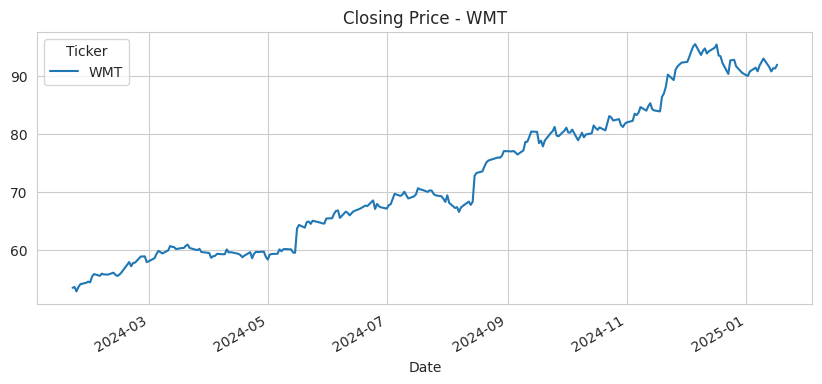

In [91]:
# Define WMT after fetching the data
if 'WMT' in stock_data:
    WMT = stock_data['WMT']
else:
    print("WMT data is not available.")

# Now, plot the historical closing price of WMT (Walmart Inc.)
WMT['Close'].plot(title='Closing Price - WMT', legend=True, figsize=(10, 4))


### Value at risk using the "Bootstrap" method

we will calculate the empirical quantiles from a histogram of daily returns.

Let's go ahead and use pandas to retrieve the daily returns for the JNJ, WMT & NKE stock.

In [92]:
# We'll use pct_change to find the percent change for each day

#For JNJ stocks
JNJ['Daily Return'] = JNJ['Close'].pct_change()

<ipython-input-94-24b973885a2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(JNJ['Daily Return'].dropna(), bins=100, color='r')


<Axes: xlabel='Daily Return', ylabel='Density'>

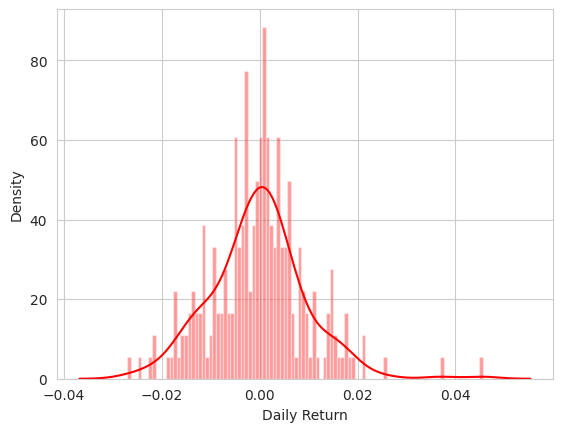

In [94]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(JNJ['Daily Return'].dropna(), bins=100, color='r')

In [95]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.01564930835598575

The 0.05 empirical quantile of JNJ stock daily returns is at -0.010. That means that with 95% confidence, our worst daily loss will not exceed 1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.010 * 1,000,000 = $10,000.

In [96]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()

<ipython-input-99-2cfc8c2abb47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WMT['Daily Return'].dropna(), bins=100, color='g')


<Axes: xlabel='Daily Return', ylabel='Density'>

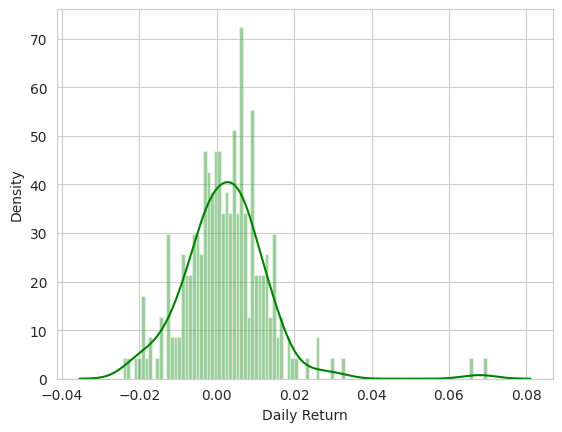

In [99]:
sns.distplot(WMT['Daily Return'].dropna(), bins=100, color='g')

In [100]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.01451562898664025

The 0.05 empirical quantile of WMT stock daily returns is at -0.013. That means that with 95% confidence, our worst daily loss will not exceed 1.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.013 * 1,000,000 = $13,000.

In [101]:
# For NKE stocks
NKE['Daily Return'] = NKE['Close'].pct_change()

<ipython-input-103-ca6931cf2a17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NKE['Daily Return'].dropna(), bins=100, color='b')


<Axes: xlabel='Daily Return', ylabel='Density'>

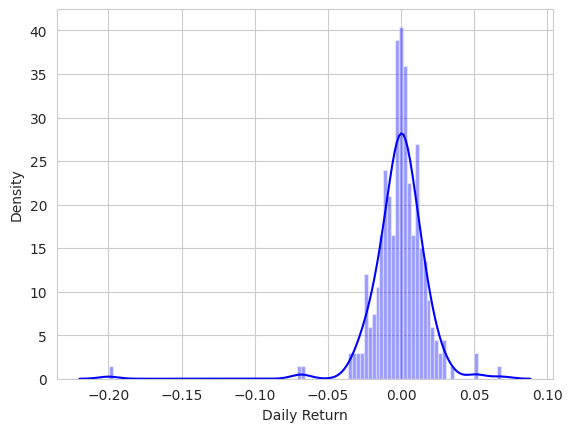

In [103]:
sns.distplot(NKE['Daily Return'].dropna(), bins=100, color='b')


In [104]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.024891879863076304

The 0.05 empirical quantile of NKE stock daily returns is at -0.018. That means that with 95% confidence, our worst daily loss will not exceed 1.8%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.018 * 1,000,000 = $18,000.